In [2]:
import quandl
import yfinance as yf
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline

In [34]:
# Pull VIX historical data
ticker = "VIX"
start= "1990-01-01" 
end= "2021-05-14"

vix_history = yf.download(ticker, start=start, end=end, progress=False)
Vix_history = vix_history.asfreq(freq='D').ffill().dropna()
vix_history.to_csv('resources/vix.csv')
vix_history.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-12-04,28200.400391,30096.900391,27953.000000,28447.699219,28447.699219,811330
2014-12-05,26551.199219,27540.699219,25974.000000,26056.500000,26056.500000,377529
2014-12-08,25231.900391,26056.500000,23582.800781,23582.800781,23582.800781,367585
2014-12-09,23582.800781,23582.800781,21274.000000,21274.000000,21274.000000,570963
2014-12-10,19789.699219,20202.000000,19212.500000,19295.000000,19295.000000,539795


In [12]:
# Pull S&P 500 historical data
ticker = "^GSPC" 
start= "1990-01-01" 
end= "2021-05-14"

sp_history = yf.download(ticker, start=start, end=end, progress=False)
sp_history = sp_history.asfreq(freq='D').ffill().dropna()
sp_history.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1990-01-02,353.399994,359.690002,351.980011,359.690002,359.690002,162070000.0
1990-01-03,359.690002,360.589996,357.890015,358.760010,358.760010,192330000.0
1990-01-04,358.760010,358.760010,352.890015,355.670013,355.670013,177000000.0
1990-01-05,355.670013,355.670013,351.350006,352.200012,352.200012,158530000.0
1990-01-06,355.670013,355.670013,351.350006,352.200012,352.200012,158530000.0


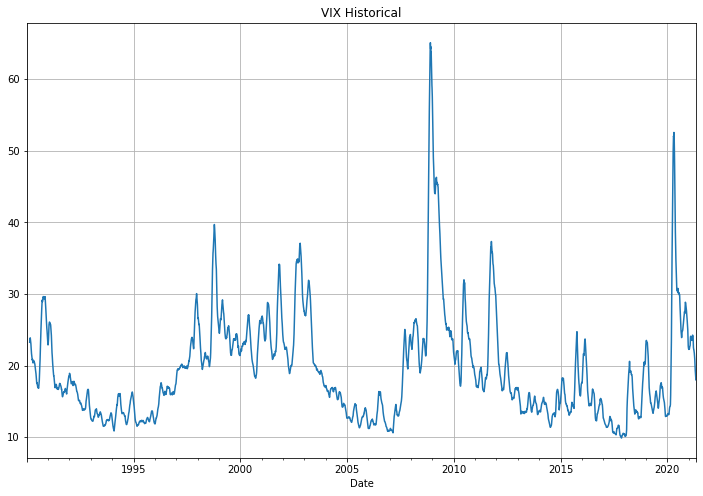

In [29]:
#Plot VIX 50-day rolling average
vix_plot = vix_history['Adj Close'].rolling(window=50).mean().plot(figsize=(12,8), title='VIX Historical', grid=True)

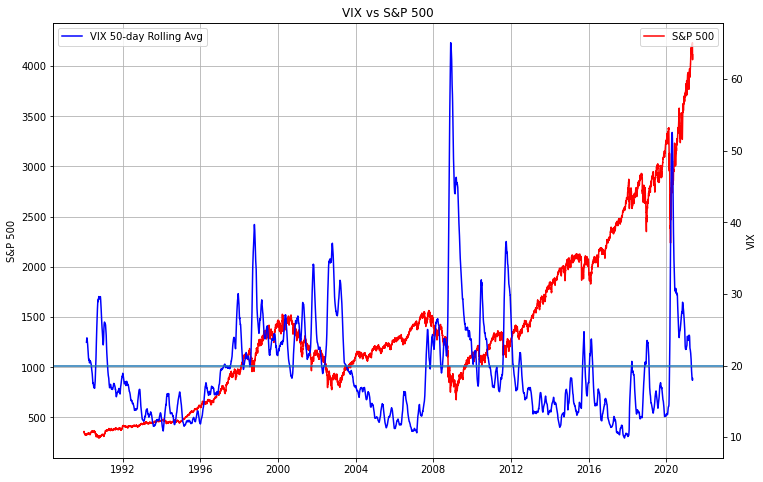

In [28]:
#Compare VIX to S&P Index and locate points where VIX crosses y value of 20 (arbitrarily selected)which is seen as fearful market
fig, ax = plt.subplots(figsize=(12,8))
plt.plot(sp_history['Adj Close'], label ='S&P 500', color='r')
ax.set_ylabel('S&P 500')
plt.grid()
ax.legend(loc='upper right')

ax2 = ax.twinx()
plt.plot(vix_history['Adj Close'].rolling(window=50).mean(), label='VIX 50-day Rolling Avg', color='b')
ax.set_title('VIX vs S&P 500')
ax2.set_ylabel('VIX')
ax2.axhline(y=20)
ax2.legend(loc='upper left')